In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import os

In [2]:
BASE = '/Users/mchrusci/uj/shaper_data/adversarial/fixed'

In [3]:
def load(path):
    adv_samples_path = os.path.join(BASE, path)
    with np.load(adv_samples_path) as adv_samples:
        X = adv_samples['X']
        Y = adv_samples['Y']
        pred = adv_samples['pred']
        prob = adv_samples['prob']
    return X, Y, pred, prob

def load_drawings(path):
    with np.load(path) as data:
        X = data['drawings']
        Y = data['Y']
    return X, Y

def plot_idxs(X, Y, pred, prob, targeted, idxs, name):
    title = 'target = %d' if targeted else 'true = %d'
    fig = plt.figure(figsize=(10,3))
    fig.suptitle('%s adversarial samples' % name, fontsize=12)
    
    def plot_one_sample(i):
        plt.subplot(1, 5, i + 1)
        plt.title(title % Y[idxs[i]] + '\npred = %d (%.2f)' % (pred[idxs[i]], prob[idxs[i]]))
        plt.axis('off')
        plt.imshow(X[idxs[i]].reshape(28, 28), cmap='gray')
    
    for i in range(len(idxs)):
        plot_one_sample(i)
    
    plt.show()

def plot_random(X, Y, pred, prob, targeted):
    idxs = np.random.randint(0, X.shape[0], 5)
    plot_idxs(X, Y, pred, prob, targeted, idxs, 'Random')
    
def plot_random_drawings(X, n=None, accs=None):
    idxs = np.random.randint(0, X.shape[0], 5)
    fig = plt.figure(figsize=(10,3))
    if n is None and accs is None:
        pass
    else:
        fig.suptitle('Drawned mnist, n = %d, accurracy = %f' % (n, accs[n-1]), fontsize=12)
    
    def plot_one_sample(i):
        plt.subplot(1, 5, i + 1)
        plt.axis('off')
        plt.imshow(X[idxs[i]].reshape(28, 28), cmap='gray')
    
    for i in range(len(idxs)):
        plot_one_sample(i)
    
    plt.show()
    
def plot_best(X, Y, pred, prob, targeted):
    success_samples_idx = np.where(pred == Y) if targeted else np.where(pred != Y)
    probs_sorted = prob.argsort()[::-1]
    idxs = []
    for i in probs_sorted:
        if i in success_samples_idx[0]:
            idxs.append(i)
        if len(idxs) == 5:
            break
    
    plot_idxs(X, Y, pred, prob, targeted, idxs, 'Best')
    
def plot_drawing_defense(path, n):
    seed = np.random.randint(0, 1000)
    X, _ = load_drawings(os.path.join(BASE, path.split('.npz')[0] + f'-redrawned-{n}.npz'))
    np.random.seed(seed)
    plot_random_drawings(X)
    
def plot_defense_accs(accs, adv_acc, method):
    plt.plot(accs)
    plt.axhline(y=adv_acc, linestyle='--', c='C1')
    plt.xlabel('n')
    plt.ylabel('adversarial success')
    plt.legend(['redrawn attack', 'attack'])
    plt.title(method)
    plt.show()

# Testowany model
accuracy = 0.9914  
Model A (3,382,346 parameters): Conv(64, 5, 5) + Relu, Conv(64, 5, 5) + Relu,
Dropout(0.25), FC(128) + Relu, Dropout(0.5), FC + Softmax

### Accuracy na rysunkach

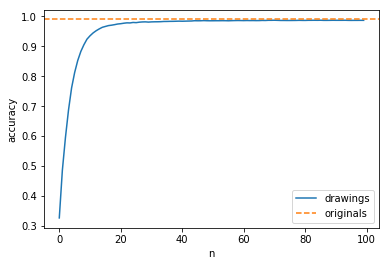

In [5]:
accs = [0.3267, 0.4862, 0.5953, 0.6875, 0.7613, 0.8129, 0.8528, 0.8829, 0.9054, 0.9241, 0.9355, 0.945, 0.9524, 0.9585, 0.9638, 0.9667, 0.9695, 0.9709, 0.9727, 0.9748, 0.9759, 0.9775, 0.9787, 0.9784, 0.98, 0.9794, 0.9809, 0.9817, 0.982, 0.9812, 0.9819, 0.9822, 0.9823, 0.9826, 0.9833, 0.9834, 0.9837, 0.9838, 0.9841, 0.9844, 0.9841, 0.9844, 0.9847, 0.9849, 0.9858, 0.9856, 0.9857, 0.9862, 0.9858, 0.9856, 0.9857, 0.9858, 0.9858, 0.986, 0.9859, 0.9856, 0.986, 0.9863, 0.9865, 0.9864, 0.9862, 0.9865, 0.9863, 0.9864, 0.9862, 0.9863, 0.9868, 0.9866, 0.9872, 0.9872, 0.9874, 0.9871, 0.9867, 0.9867, 0.9866, 0.9866, 0.9867, 0.9868, 0.9871, 0.9869, 0.9868, 0.9872, 0.9872, 0.9873, 0.9872, 0.9874, 0.987, 0.987, 0.9871, 0.9873, 0.9872, 0.9872, 0.9872, 0.9873, 0.987, 0.9869, 0.987, 0.987, 0.9871, 0.9871]
plt.plot(accs)
plt.xlabel('n')
plt.ylabel('accuracy')
plt.axhline(y=0.9914, linestyle='--', c='C1')
plt.legend(['drawings', 'originals'])
plt.show()

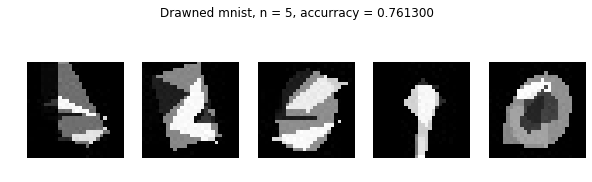

In [13]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-5.npz')
plot_random_drawings(X, 5, accs)

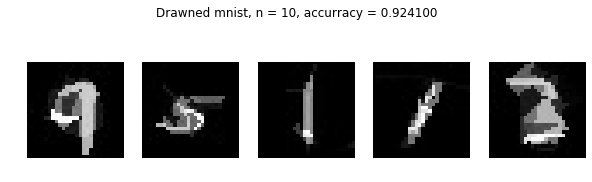

In [6]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-10.npz')
plot_random_drawings(X, 10, accs)

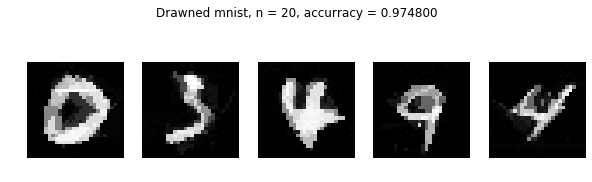

In [7]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-20.npz')
plot_random_drawings(X, 20, accs)

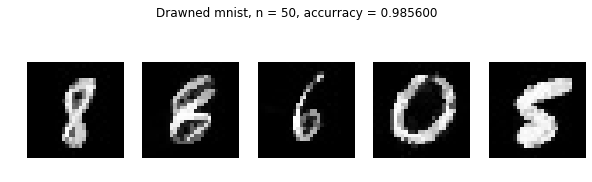

In [8]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-50.npz')
plot_random_drawings(X, 50, accs)

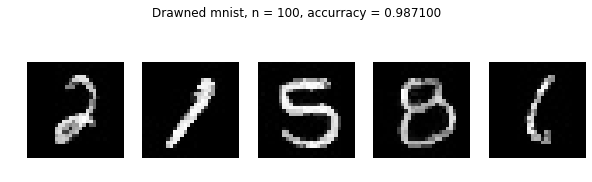

In [9]:
X, _ = load_drawings('/Users/mchrusci/uj/shaper_data/adversarial/drawned-mnist/test_drawings_npz/test-mnist-n-100.npz')
plot_random_drawings(X, 100, accs)

# Testowane ataki
norm = linf, eps = 0.3
* baseline
    * DoM
    * DoM-T
    * Random
* transfer
    * **FGS**
    * **IFGS**
    * Rand_FGS
    * **Carlini**

### DoM
adversarial success before = 39.33%    
average l2 perturbation = 5.63

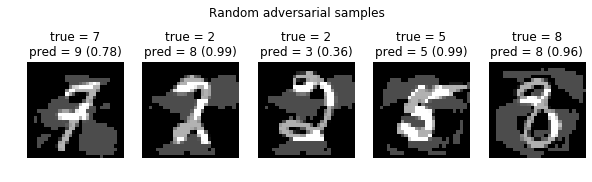

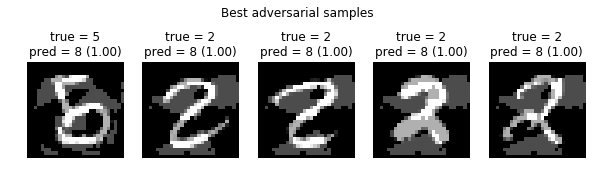

In [5]:
X, Y, pred, prob = load('examples-to-draw/baseline-norm-linf-alpha-0.0-targeted-0-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

redrawned adversarial samples:

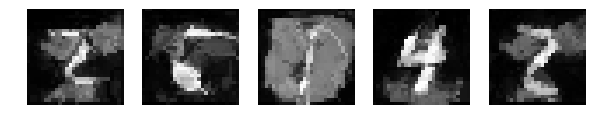

In [4]:
plot_drawing_defense('baseline-dom/baseline-norm-linf-alpha-0.0-targeted-0-adv-samples', n=100)

adversarial success after defense:

In [5]:
accs = [0.895, 0.8932, 0.8888, 0.8841, 0.8806, 0.8788, 0.8702, 0.8677, 0.8632, 0.8548, 0.8488, 0.8445, 0.8414, 0.8383, 0.8337, 0.8292, 0.8278, 0.826, 0.8221, 0.8187, 0.8147, 0.8129, 0.8088, 0.8025, 0.7971, 0.7899, 0.7882, 0.7853, 0.7768, 0.775, 0.7731, 0.7689, 0.7665, 0.7598, 0.7536, 0.7502, 0.746, 0.7456, 0.7394, 0.7386, 0.7354, 0.7324, 0.7294, 0.7267, 0.7262, 0.7221, 0.7192, 0.7169, 0.7164, 0.7135, 0.7126, 0.7105, 0.7059, 0.7038, 0.7017, 0.6995, 0.6979, 0.6959, 0.6953, 0.696, 0.6925, 0.6908, 0.6883, 0.6841, 0.6798, 0.6779, 0.6766, 0.6761, 0.6725, 0.6701, 0.6689, 0.6674, 0.6653, 0.6646, 0.6621, 0.6621, 0.6622, 0.6597, 0.6583, 0.6564, 0.6546, 0.6528, 0.6507, 0.648, 0.648, 0.6453, 0.6418, 0.6413, 0.6396, 0.6389, 0.6361, 0.6355, 0.6346, 0.6352, 0.6348, 0.6316, 0.6276, 0.6284, 0.6278, 0.6275]

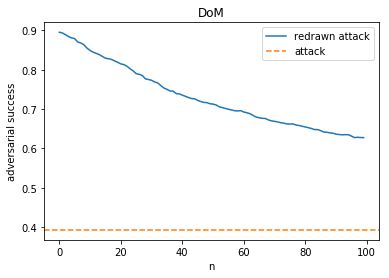

In [6]:
plot_defense_accs(accs=accs, adv_acc=0.3933, method='DoM')

### DoM-T
adversarial success = 13.59%  
average l2 perturbation = 5.56

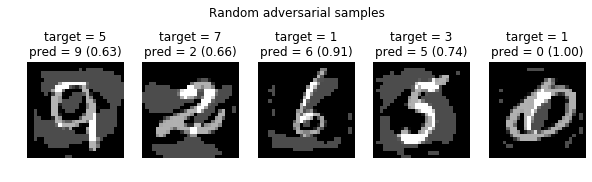

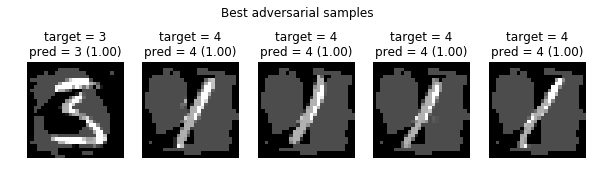

In [24]:
X, Y, pred, prob = load('baseline-norm-linf-alpha-0.0-targeted-1-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=True)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=True)

redrawned adversarial samples:

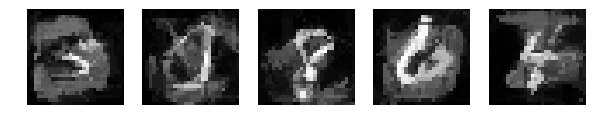

In [7]:
plot_drawing_defense('baseline-dom-targeted/baseline-norm-linf-alpha-0.0-targeted-1-adv-samples', n=100)

adversarial success after defense:

In [9]:
accs = [0.1521, 0.1807, 0.2014, 0.2183, 0.2281, 0.2417, 0.2527, 0.2562, 0.2608, 0.2617, 0.27, 0.272, 0.2746, 0.2796, 0.2751, 0.2751, 0.2773, 0.2759, 0.2789, 0.2768, 0.2776, 0.2749, 0.2752, 0.2739, 0.2725, 0.2732, 0.274, 0.2763, 0.277, 0.2755, 0.2728, 0.2725, 0.2686, 0.2687, 0.2633, 0.2627, 0.2604, 0.2616, 0.2605, 0.2593, 0.2575, 0.2562, 0.2578, 0.2561, 0.2538, 0.2518, 0.2508, 0.2519, 0.2492, 0.2499, 0.2496, 0.2498, 0.2479, 0.2485, 0.2475, 0.2467, 0.2478, 0.2461, 0.2438, 0.2428, 0.2428, 0.2421, 0.2416, 0.2395, 0.2377, 0.2366, 0.235, 0.2335, 0.2351, 0.2346, 0.236, 0.2356, 0.2338, 0.2336, 0.2338, 0.2343, 0.2319, 0.232, 0.2296, 0.2305, 0.2294, 0.2312, 0.2297, 0.2309, 0.2294, 0.2277, 0.2264, 0.2249, 0.2249, 0.2243, 0.2237, 0.2234, 0.2222, 0.2207, 0.2207, 0.2197, 0.2209, 0.2202, 0.2198, 0.2184]

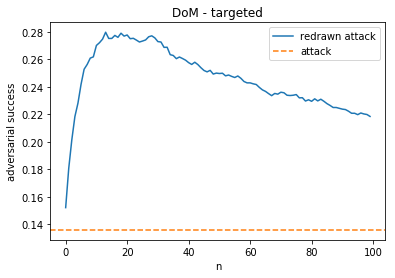

In [10]:
plot_defense_accs(accs=accs, adv_acc=0.1359, method='DoM - targeted')

### Random
adversarial success = 7.59%   
average l2 perturbation = 6.12

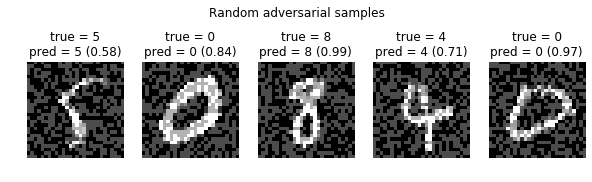

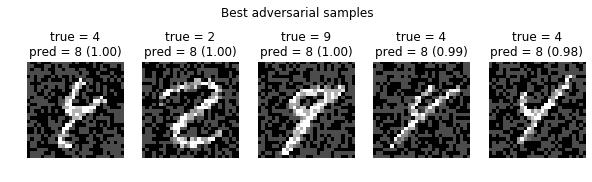

In [26]:
X, Y, pred, prob = load('baseline-norm-linf-alpha-0.6-targeted-0-adv-samples.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

redrawned adversarial samples:

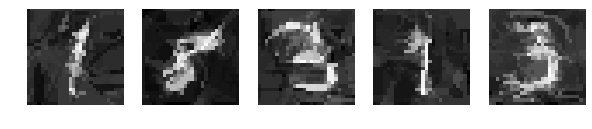

In [12]:
plot_drawing_defense('baseline-random/baseline-norm-linf-alpha-0.6-targeted-0-adv-samples', n=50)

adversarial success after defense:

In [14]:
accs = [0.831, 0.7762, 0.7252, 0.6803, 0.6414, 0.6072, 0.5673, 0.5405, 0.5132, 0.4822, 0.461, 0.4358, 0.4162, 0.4025, 0.3849, 0.3719, 0.3608, 0.3449, 0.3351, 0.3261, 0.3158, 0.3065, 0.297, 0.2907, 0.2802, 0.273, 0.2668, 0.2604, 0.2573, 0.2518, 0.2446, 0.241, 0.2398, 0.2352, 0.2285, 0.2244, 0.2197, 0.2155, 0.2128, 0.2095, 0.2053, 0.2021, 0.1995, 0.1956, 0.1935, 0.1913, 0.1857, 0.1843, 0.1841, 0.1827, 0.1812, 0.1804, 0.1781, 0.1756, 0.1744, 0.173, 0.1706, 0.17, 0.1686, 0.1664, 0.1661, 0.1639, 0.1632, 0.1627, 0.1618, 0.1609, 0.1593, 0.1574, 0.1588, 0.1583, 0.1574, 0.1569, 0.1559, 0.156, 0.1541, 0.153, 0.1543, 0.1517, 0.15, 0.149, 0.1485, 0.1487, 0.1474, 0.1472, 0.1477, 0.1471, 0.1475, 0.1447, 0.1443, 0.1422, 0.1422, 0.1414, 0.1409, 0.1389, 0.1376, 0.1375, 0.1363, 0.1348, 0.1338, 0.1349]

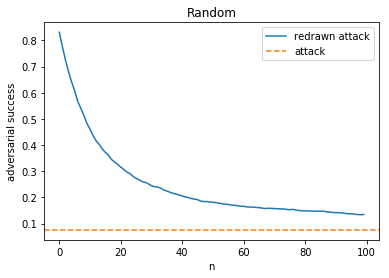

In [16]:
plot_defense_accs(accs=accs, adv_acc=0.0759, method='Random')

### FGS
modelB $\rightarrow$ modelB: 89.0%  
modelB $\rightarrow$ modelA: 66.3%

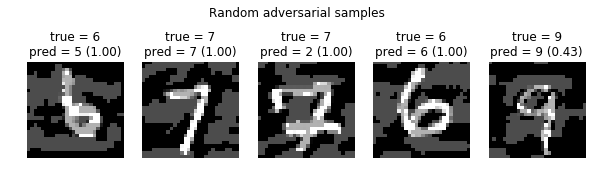

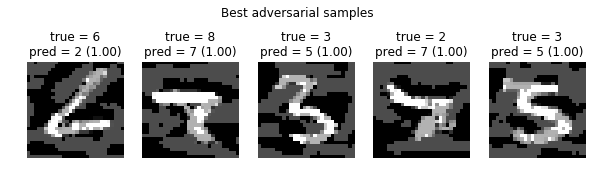

In [5]:
X, Y, pred, prob = load('fgs.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

redrawned adversarial samples:

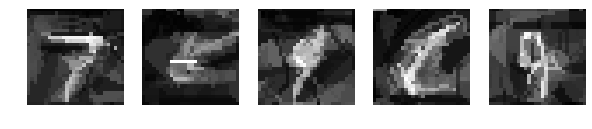

In [27]:
plot_drawing_defense('fgs/fgs.npz', n=40)

adversarial success after defense:

In [17]:
accs = [0.8529, 0.8203, 0.7954, 0.7721, 0.7481, 0.7319, 0.7159, 0.6987, 0.6888, 0.6734, 0.6671, 0.6549, 0.6494, 0.647, 0.6374, 0.6331, 0.6292, 0.6217, 0.6158, 0.6129, 0.6075, 0.6031, 0.5997, 0.5973, 0.5942, 0.5949, 0.5939, 0.5881, 0.5877, 0.586, 0.5819, 0.582, 0.5797, 0.5754, 0.5742, 0.5715, 0.5726, 0.5728, 0.5717, 0.5707, 0.5714, 0.5703, 0.5695, 0.5696, 0.5687, 0.5692, 0.5693, 0.5711, 0.5676, 0.5672, 0.5673, 0.5682, 0.568, 0.5678, 0.5687, 0.5653, 0.5661, 0.5683, 0.5704, 0.5679, 0.5696, 0.5689, 0.5698, 0.5712, 0.5716, 0.5713, 0.5708, 0.5708, 0.5712, 0.5722, 0.5714, 0.5712, 0.5717, 0.572, 0.5715, 0.5703, 0.5695, 0.5697, 0.5712, 0.5695, 0.571, 0.5704, 0.5692, 0.5696, 0.5675, 0.5698, 0.5682, 0.5688, 0.5666, 0.5658, 0.567, 0.5656, 0.5683, 0.5685, 0.5675, 0.567, 0.5687, 0.5688, 0.5677, 0.5709]

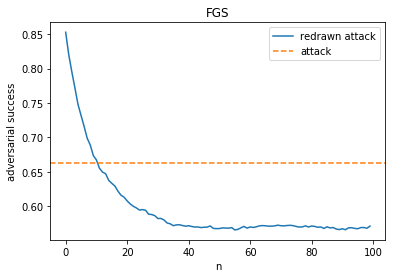

In [18]:
plot_defense_accs(accs=accs, adv_acc=0.663, method='FGS')

### IFGS
modelB $\rightarrow$ modelB: 99.7%  
modelB $\rightarrow$ modelA: 86.3%

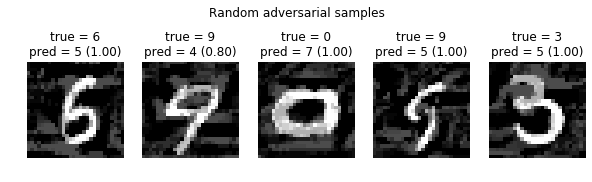

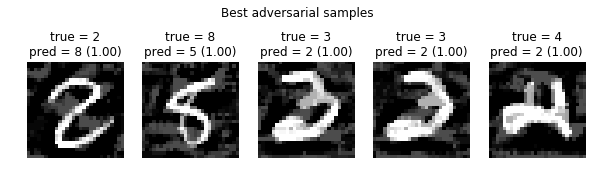

In [10]:
X, Y, pred, prob = load('ifgs.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

redrawned adversarial samples:

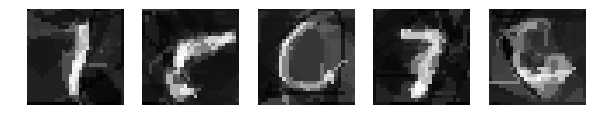

In [32]:
plot_drawing_defense('ifgs/ifgs.npz', n=30)

adversarial success after defense:

In [19]:
accs = [0.8456, 0.8034, 0.7687, 0.7349, 0.7062, 0.6844, 0.6608, 0.6482, 0.635, 0.6165, 0.6072, 0.596, 0.595, 0.5848, 0.5712, 0.564, 0.5624, 0.5615, 0.559, 0.5542, 0.5508, 0.5474, 0.5459, 0.5474, 0.546, 0.5448, 0.5448, 0.5499, 0.5506, 0.5521, 0.5487, 0.5464, 0.5501, 0.5514, 0.5495, 0.5513, 0.5526, 0.5535, 0.5548, 0.5561, 0.5604, 0.561, 0.563, 0.5667, 0.566, 0.5657, 0.5673, 0.5697, 0.5705, 0.5721, 0.5724, 0.576, 0.5754, 0.5779, 0.578, 0.5783, 0.5797, 0.584, 0.5844, 0.5832, 0.5855, 0.5855, 0.5853, 0.587, 0.5865, 0.5886, 0.5908, 0.593, 0.5941, 0.594, 0.5959, 0.5954, 0.5971, 0.599, 0.599, 0.6025, 0.603, 0.6055, 0.6061, 0.6073, 0.6084, 0.609, 0.6097, 0.611, 0.6125, 0.6117, 0.6123, 0.6142, 0.6162, 0.6176, 0.6169, 0.6167, 0.6164, 0.6169, 0.6192, 0.6188, 0.6214, 0.6233, 0.6246, 0.6265]

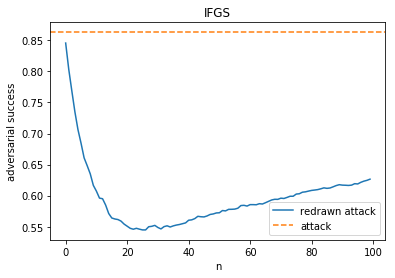

In [20]:
plot_defense_accs(accs=accs, adv_acc=0.863, method='IFGS')

### RAND_FGS
modelB $\rightarrow$ modelB: 88.6%  
modelB $\rightarrow$ modelA: 63.4%

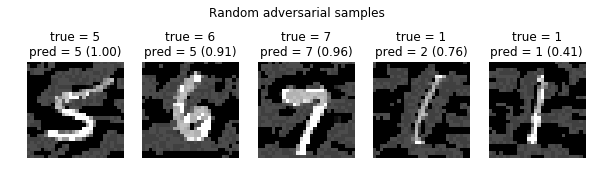

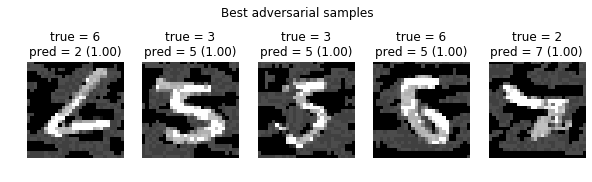

In [11]:
X, Y, pred, prob = load('rand_fgs.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

redrawned adversarial samples:

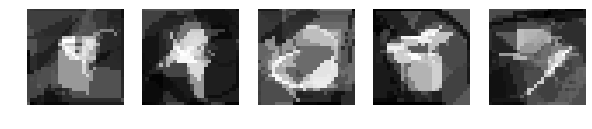

In [41]:
plot_drawing_defense('rand_fgs/rand_fgs.npz', n=20)

adversarial success after defense:

In [21]:
accs = [0.8545, 0.8178, 0.7915, 0.767, 0.7427, 0.7191, 0.7018, 0.6817, 0.6682, 0.6558, 0.645, 0.6312, 0.6238, 0.6166, 0.6042, 0.5999, 0.5945, 0.5875, 0.5769, 0.5765, 0.5697, 0.5677, 0.5657, 0.5613, 0.5589, 0.553, 0.5488, 0.5463, 0.5434, 0.5398, 0.5384, 0.5378, 0.5374, 0.5363, 0.5364, 0.5357, 0.5322, 0.5322, 0.5296, 0.5306, 0.5298, 0.5265, 0.5246, 0.5245, 0.5246, 0.5264, 0.5241, 0.5232, 0.521, 0.5202, 0.5199, 0.5197, 0.5197, 0.5185, 0.5197, 0.5199, 0.5202, 0.5212, 0.5221, 0.5206, 0.5187, 0.5192, 0.5203, 0.519, 0.5192, 0.5167, 0.5151, 0.5181, 0.5189, 0.5183, 0.5188, 0.5169, 0.5172, 0.518, 0.5179, 0.519, 0.5164, 0.5147, 0.5159, 0.5158, 0.5161, 0.5169, 0.519, 0.5178, 0.5172, 0.519, 0.5209, 0.5189, 0.5164, 0.518, 0.5194, 0.5202, 0.521, 0.5191, 0.5206, 0.5184, 0.5188, 0.5185, 0.5193, 0.5206]

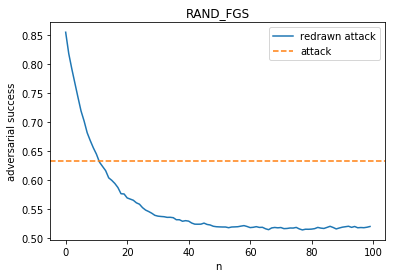

In [22]:
plot_defense_accs(accs=accs, adv_acc=0.634, method='RAND_FGS')

### Carlini
modelB $\rightarrow$ modelB: 100%  
modelB $\rightarrow$ modelA: 85.9%

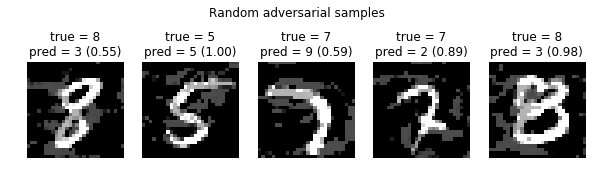

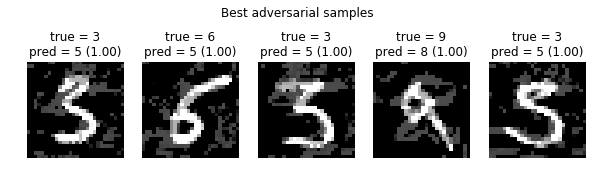

In [5]:
X, Y, pred, prob = load('CW.npz')
plot_random(X=X, Y=Y, pred=pred, prob=prob, targeted=False)
plot_best(X=X, Y=Y, pred=pred, prob=prob, targeted=False)

redrawned adversarial samples:

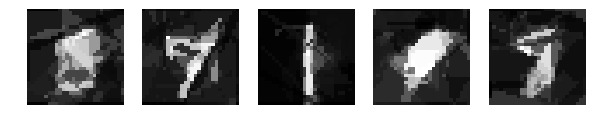

In [35]:
plot_drawing_defense('CW/CW.npz', n=20)

adversarial success after defense:

In [33]:
accs = [0.842, 0.792, 0.766, 0.714, 0.708, 0.672, 0.654, 0.636, 0.613, 0.601, 0.594, 0.594, 0.57, 0.56, 0.555, 0.549, 0.561, 0.526, 0.531, 0.525, 0.532, 0.53, 0.526, 0.526, 0.523, 0.536, 0.532, 0.528, 0.527, 0.533, 0.53, 0.526, 0.53, 0.531, 0.527, 0.527, 0.528, 0.531, 0.54, 0.542, 0.536, 0.541, 0.552, 0.553, 0.559, 0.558, 0.564, 0.557, 0.568, 0.56, 0.555, 0.557, 0.555, 0.556, 0.559, 0.55, 0.555, 0.55, 0.551, 0.552, 0.557, 0.56, 0.561, 0.569, 0.567, 0.566, 0.573, 0.579, 0.585, 0.582, 0.575, 0.58, 0.59, 0.589, 0.592, 0.588, 0.593, 0.591, 0.589, 0.589, 0.586, 0.585, 0.577, 0.58, 0.584, 0.582, 0.582, 0.588, 0.594, 0.592, 0.591, 0.596, 0.6, 0.603, 0.602, 0.604, 0.606, 0.606, 0.605, 0.609]

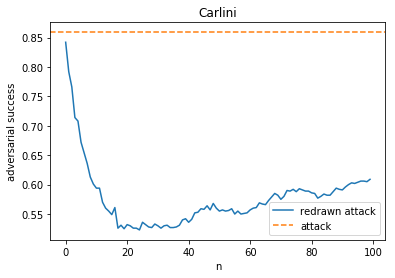

In [36]:
plot_defense_accs(accs=accs, adv_acc=0.859, method='Carlini')